<a href="https://colab.research.google.com/github/Gabriel325896/Analisis-Numerico/blob/main/PSO_4_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Librerias:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import pandas as pd
#==

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Funcion objetivo (minimizar)
def fmin(P,PD,a,b,c,Pb):
  ng = len(P)
  fj = []
  for j in range(0,len(P[0])):
    cosij = 0
    Sg = 0
    viol = 0
    for i in range(0,ng):
      cosij = c[i]*((P[i][j])**2) + b[i]*P[i][j] + a[i] + cosij
      Sg = P[i][j] + Sg
      if P[i][j] < Pb[i][0] or Pb[i][1] < P[i][j]:
          viol = viol + 1
    if  Sg < 0.99*PD or Sg > 1.01*PD:
      violacion1 = 1
    else:
      violacion1 = 0
    f_costos = cosij + 1000000000000*(violacion1+viol)
    fj.append(f_costos)
  return fj


In [4]:
def ejecutar_despacho(PD,hh):
    # Pmin - Pmax
    P1b = [10,500] # MW
    P2b = [12,365] # MW
    P3b = [50,720] # MW
    P4b = [20,631] # MW
    Pb = [P1b, P2b, P3b, P4b]
    ## Coeficientes de funcion de costos
    a = [64.67, 65.46, 22.92, 51.]
    b = [795.5, 1448.6, 838.1, 190.92]
    c = [1.15, 0.82, 1.53, 2.46]
    # Incializar particulas
    n_particles = 500# 3000 antes
    min = 0
    max = 700
    nng = len(a)
    X = np.random.rand(nng, n_particles) * (max - min) + min #Posición aleatoria de Particulas
    V = np.random.randn(nng, n_particles) * 0.01 #Velocidad aleatoria inicial de Particulas
    # Pbest y Gbest -> Inicial:
    pbest = X 
    f_0 = np.array(fmin(X,PD,a,b,c,Pb)) 
    min_v = f_0.min() # encontrar el minimo valor
    ind_min = np.where(f_0 == min_v)[0][0]
    gbest = X[:,ind_min] # coordenada para g best en el plano
    #Hiperparametros
    c1 = 0.1
    c2 = 0.3
    w = 0.002
    n = 5000 # cant. max de iteraciones
    j = 1 #contador que inicia en 0
    Conv_t = []
    while True:
        r = np.random.rand(2) # [r1 r2] 
        r1 = r[0] ; r2 = r[1] 
        V = w*V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1) - X) #Función de actualización de velocidad de PSO
        X = X + V
        f_k = np.array(fmin(X,PD,a,b,c,Pb))
        for i in range(0,n_particles):
            if f_k[i] < f_0[i]:
                pbest[:,i] = X[:,i]
        f_gbest = np.array(fmin(pbest,PD,a,b,c,Pb))
        min_ant = min_v
        Conv_t.append(min_ant)
        min_v = f_gbest.min() # encontrar el minimo
        ind_min = np.where(f_gbest == min_v)[0][0] # el lugar donde esta el minimo
        gbest = pbest[:,ind_min] # coordenada para g best
        f_0 = f_k 
        j = j + 1
        if j >= n or abs(min_v - min_ant) < 1e-9:
            Conv_t.append(min_v)
            break
    plt.plot(Conv_t, 'o-')
    plt.xticks(np.arange(0, len(Conv_t), 1))
    plt.grid()
    plt.title('Funcion de costo en hora ' + str(hh) )
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo [$]')
    plt.show()
    return gbest

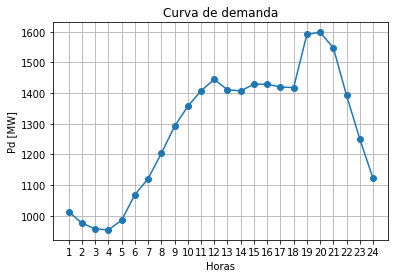

1013.506


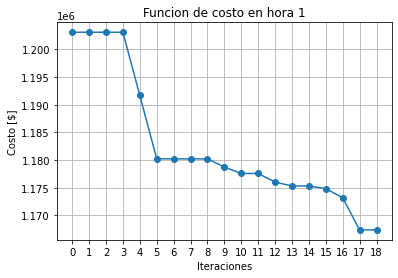

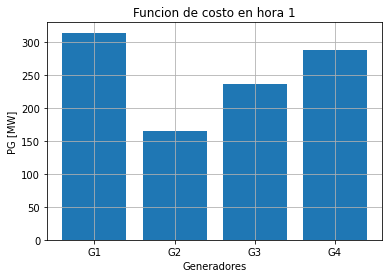

1003.3750576185166
976.565


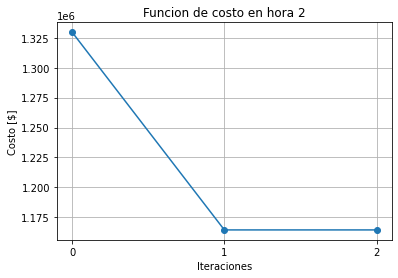

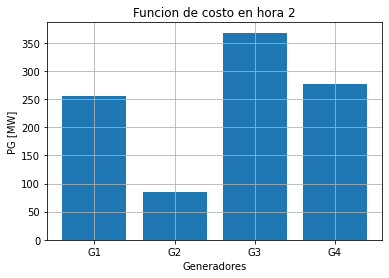

985.3110865797674
957.746


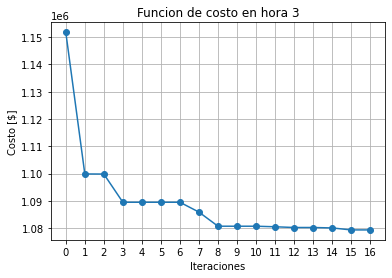

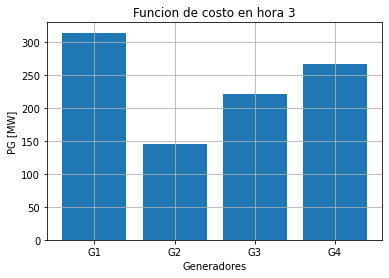

948.4404497386296
954.244


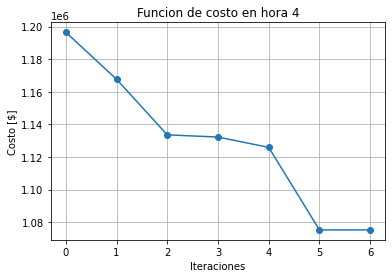

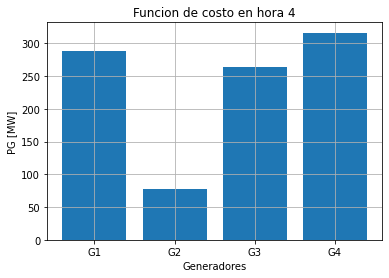

945.2256860204998
985.864


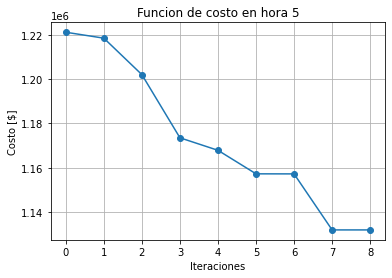

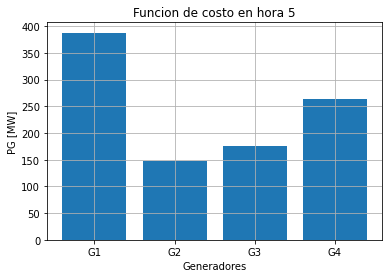

976.5422378818394
1068.756


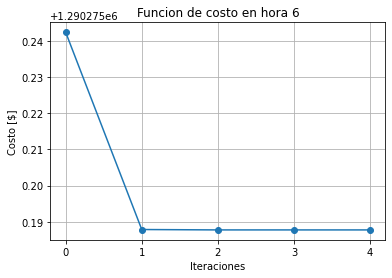

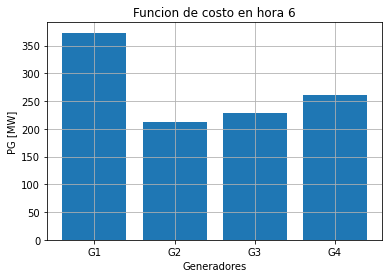

1074.7289932965953
1121.099


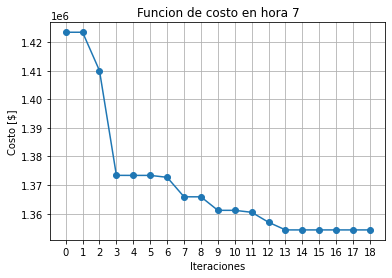

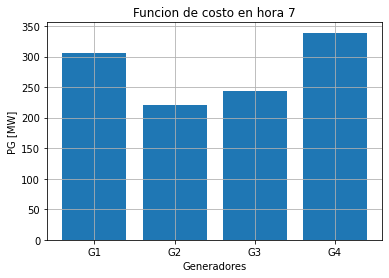

1109.907463460623
1203.345


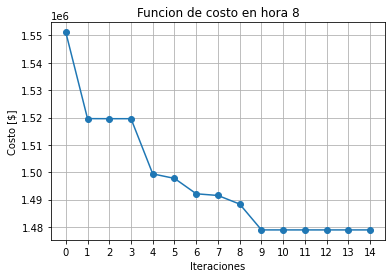

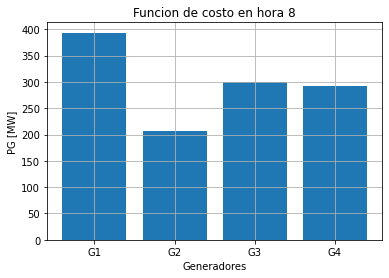

1191.4416541907344
1291.66


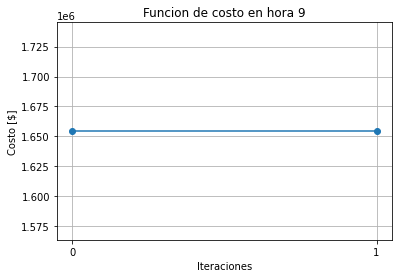

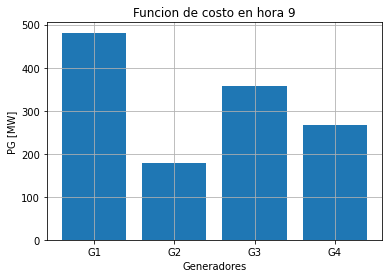

1283.4764757416153
1356.6


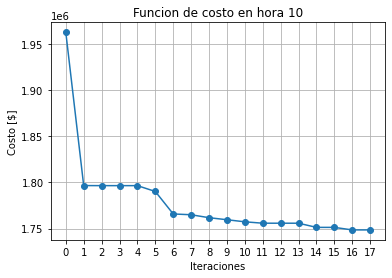

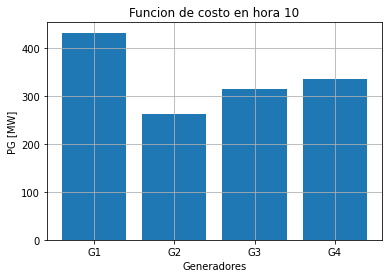

1343.1090545894467
1407.396


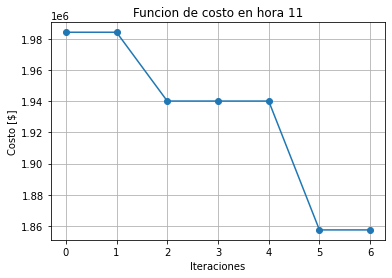

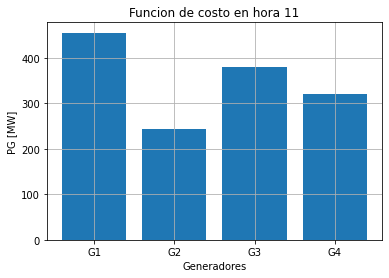

1400.2646897041745
1444.813


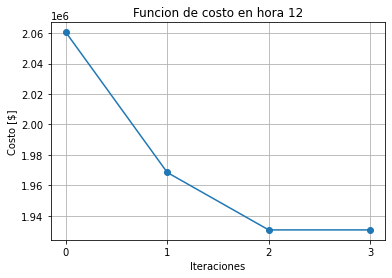

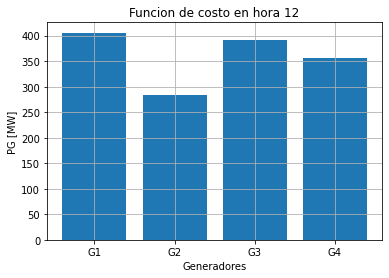

1436.480954404641
1410.796


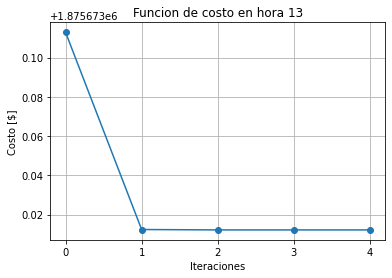

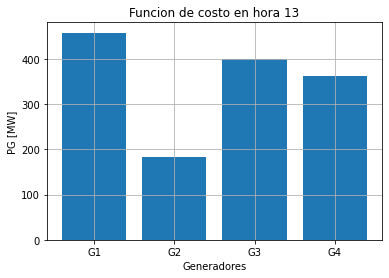

1406.0560049725395
1407.26


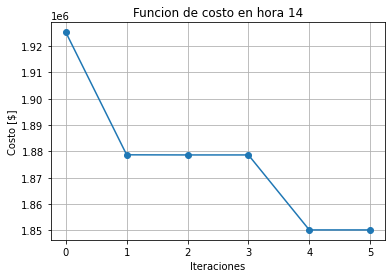

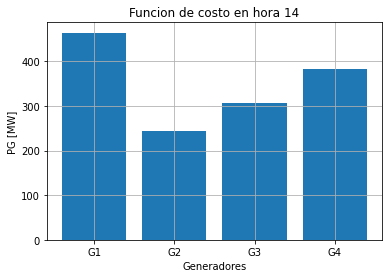

1395.6960096209536
1429.003


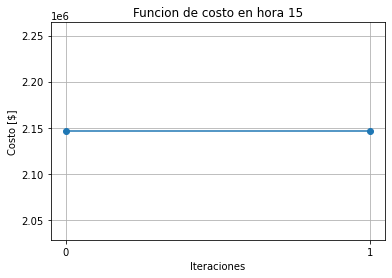

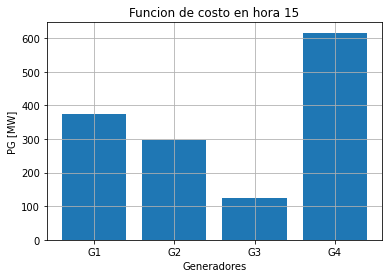

1414.9395068191411
1428.884


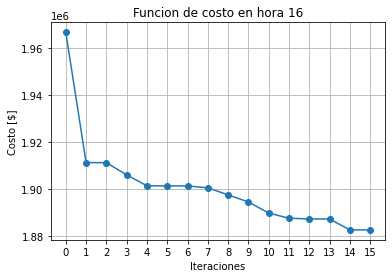

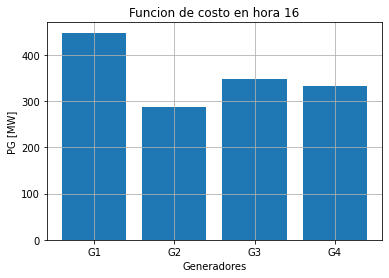

1415.2160354491175
1419.857


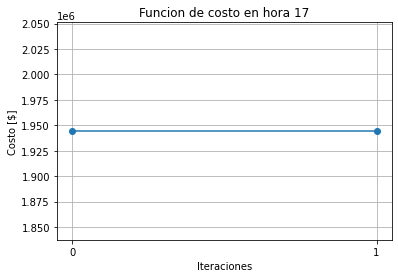

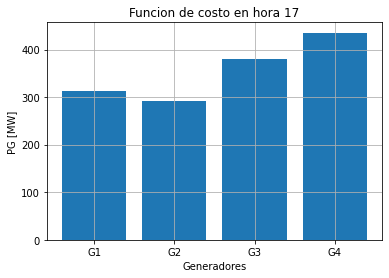

1420.4815026939064
1417.885


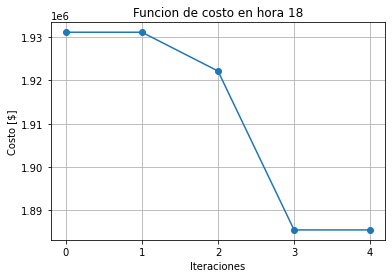

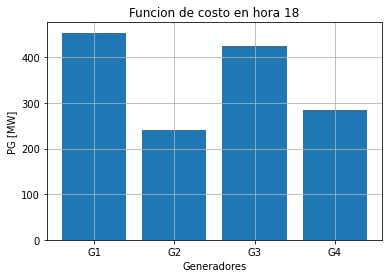

1406.8835368135333
1591.081


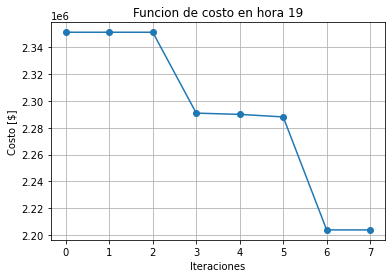

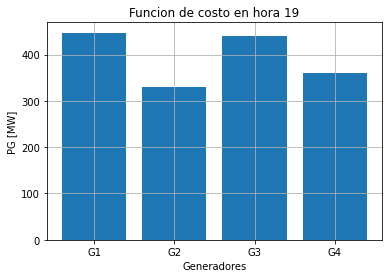

1576.255496457706
1598.272


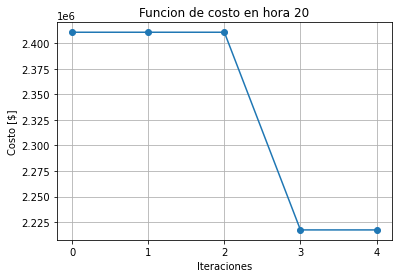

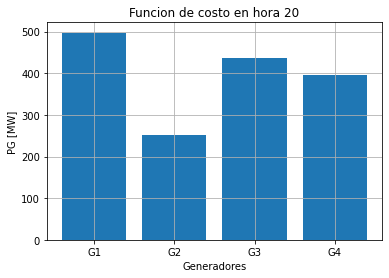

1582.3075192452382
1547.629


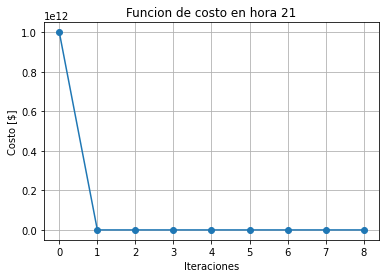

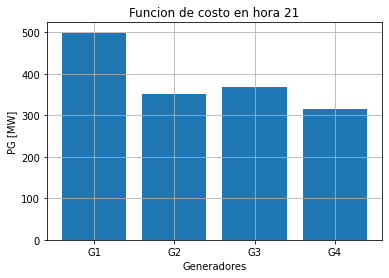

1535.640219112918
1392.487


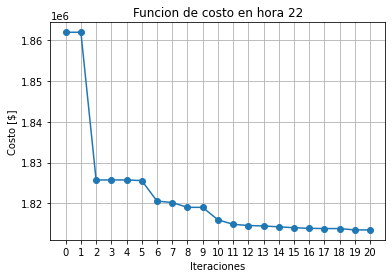

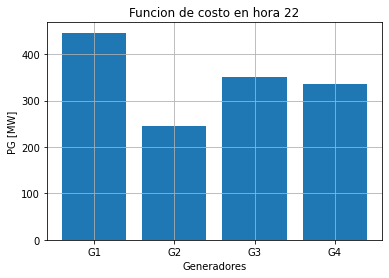

1378.567225544102
1250.486


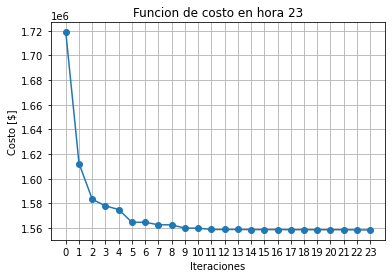

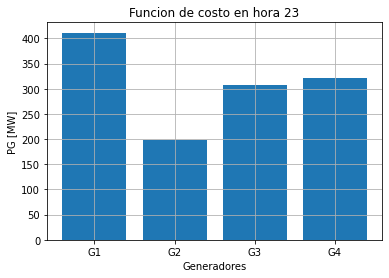

1237.9885046680274
1122.306


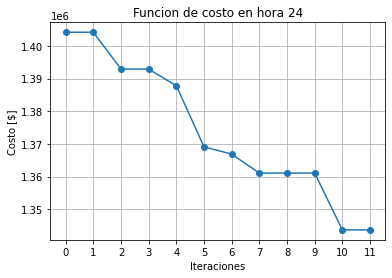

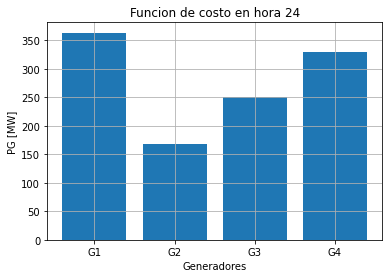

1111.4907223663906
[1003.3750576185166, 985.3110865797674, 948.4404497386296, 945.2256860204998, 976.5422378818394, 1074.7289932965953, 1109.907463460623, 1191.4416541907344, 1283.4764757416153, 1343.1090545894467, 1400.2646897041745, 1436.480954404641, 1406.0560049725395, 1395.6960096209536, 1414.9395068191411, 1415.2160354491175, 1420.4815026939064, 1406.8835368135333, 1576.255496457706, 1582.3075192452382, 1535.640219112918, 1378.567225544102, 1237.9885046680274, 1111.4907223663906]


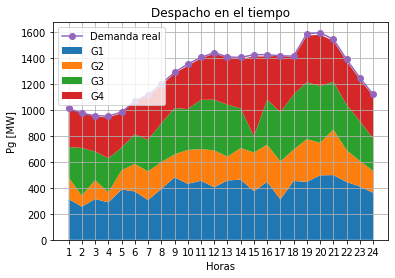

In [7]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Despacho_PSO/demanda_2.xlsx', header=None)
nd = len(df[0])
Gen_t = []
Val_gen = []
G = []
ng = 4

x=range(1,25)
plt.plot(x,df[0],'-o',label='Demanda real')
plt.xticks(np.arange(1, 25, 1))
plt.grid()
plt.title('Curva de demanda')
plt.xlabel('Horas')
plt.ylabel('Pd [MW]')
plt.show()


for i in range(ng):
  G.append([])

for i in range(nd):
    demanda_i = df[0][i]
    print(demanda_i)
    Xgen = ejecutar_despacho(demanda_i,i+1)
    Plot_bar = []
    for j in range(ng):
        G[j].append(Xgen[j])
        Plot_bar.append('G'+str(j+1))
    plt.bar(Plot_bar,Xgen)
    plt.title('Funcion de costo en hora ' + str(i+1))
    plt.xlabel('Generadores')
    plt.ylabel('PG [MW]')
    plt.grid()
    plt.show()
    Gen_t.append(Xgen)
    Val_gen.append(sum(Xgen))
    print(sum(Xgen))

print(Val_gen)


plt.stackplot(x,G,labels=Plot_bar)
plt.plot(x, df[0],'-o',label='Demanda real')
plt.legend(loc='upper left')
plt.xticks(np.arange(1, 25, 1))
plt.grid()
plt.title('Despacho en el tiempo')
plt.xlabel('Horas')
plt.ylabel('Pg [MW]')
plt.show()